In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

np.random.seed(42)

# Simulated email marketing dataset
df = pd.DataFrame({
    "Email_Sent": 1,
    "Email_Opened": np.random.choice([0, 1], size=1000, p=[0.4, 0.6]),
    "Clicked": np.random.choice([0, 1], size=1000, p=[0.7, 0.3]),
    "Converted": np.random.choice([0, 1], size=1000, p=[0.85, 0.15])
})

df.head()


,Email_Sent,Email_Opened,Clicked,Converted
0,1,0,0,0
1,1,1,0,0
2,1,1,1,1
3,1,1,1,0
4,1,0,1,0


In [6]:
p_click = df["Clicked"].mean()
p_click


np.float64(0.307)

In [7]:
clicked_users = df[df["Clicked"] == 1]
p_convert_given_click = clicked_users["Converted"].mean()
p_convert_given_click


np.float64(0.16612377850162866)

In [8]:
conditional_prob_table = pd.crosstab(
    df["Clicked"],
    df["Converted"],
    normalize="index"
)

conditional_prob_table


Converted,0,1
Clicked,,
0,0.851371,0.148629
1,0.833876,0.166124


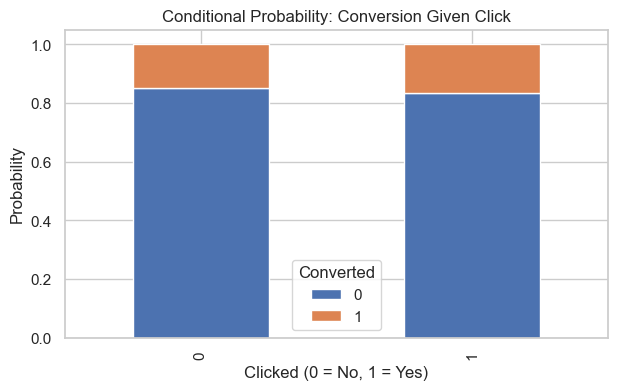

In [9]:
conditional_prob_table.plot(
    kind="bar",
    stacked=True,
    figsize=(7,4)
)

plt.title("Conditional Probability: Conversion Given Click")
plt.xlabel("Clicked (0 = No, 1 = Yes)")
plt.ylabel("Probability")
plt.legend(title="Converted")
plt.show()


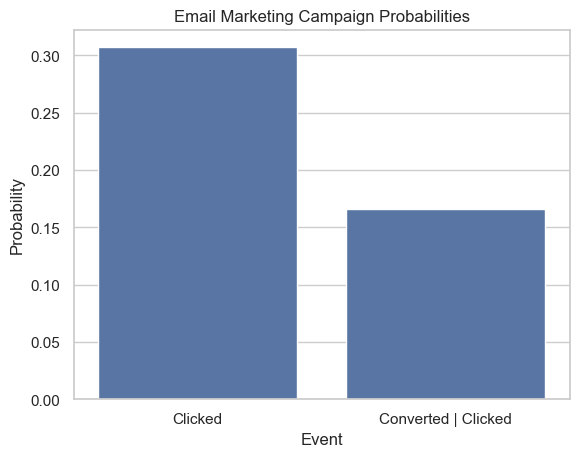

In [10]:
prob_df = pd.DataFrame({
    "Event": ["Clicked", "Converted | Clicked"],
    "Probability": [p_click, p_convert_given_click]
})

sns.barplot(x="Event", y="Probability", data=prob_df)
plt.title("Email Marketing Campaign Probabilities")
plt.show()
